[View in Colaboratory](https://colab.research.google.com/github/lnarasimhan83/anzdemo/blob/master/Devanagari.ipynb)

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
from scipy.misc import imread, imsave, imresize
from google.colab import files
import numpy as np
def upload_files():
  
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

In [72]:
list1 = upload_files()
print (list1)
train_file = list1[0]

Saving Swara_all_train.csv to Swara_all_train (1).csv
['Swara_all_train.csv']


In [74]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(
    raw_data[:,1:], raw_data[:,0], test_size=0.1)
print (x_train[3])

[255 228 178 202 224 190 177 179 152 133 122  99  68  67  72  55  61  55
  68  66  62  69  64  60  63  52  61  91 171 123  55  45  56  59  81  82
 109  98  99 120 136 131 132 145 157 145 136 144 148 141 141 146 146 150
 171 203 107  81  64  71  66  93 175 224 242 242 230 195 171 185 193 171
 226 255 248 255 255 249 255 255 248 250 255 255 241 235 243 241 216 224
 255 255 204 143 113  92  65  83  82  24 146 246 255 252 255 246 255 247
 255 255 252 245 250 248 251 249 255 255 204 129  84  98 139 199 246 230
 133  28 148 248 255 254 255 249 255 249 243 248 251 250 255 251 250 252
 235 152  66  63 173 237 254 255 255 156  74 103 227 255 248 255 255 249
 255 255 255 255 255 255 252 254 253 253 217  81  13 119 230 249 250 242
 182  76  96 239 255 254 244 252 255 249 249 254 253 250 248 248 245 255
 254 240 255 181 114 212 251 255 226 134  82 155 237 236 250 243 255 255
 251 255 252 248 248 252 255 255 248 255 254 252 255 249 240 241 239 185
  96  22 106 152 159 205 236 255 254 254 255 247 24

Text(0.5,1,'28x28 data')

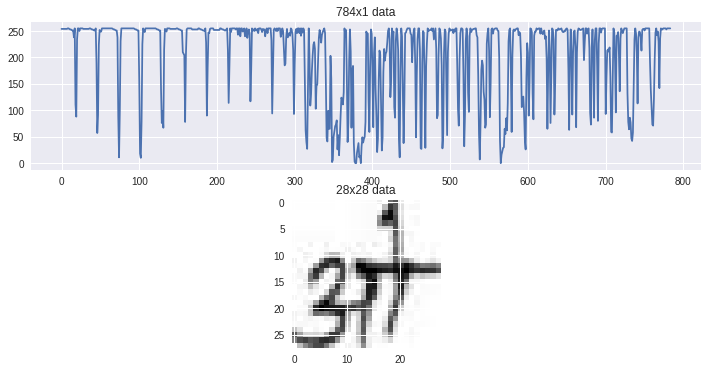

In [75]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

In [0]:
#x_train = x_train.reshape(-1, 28, 28, 1)
#x_val = x_val.reshape(-1, 28, 28, 1)  
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_val = x_val.reshape(x_val.shape[0], 28, 28,1)

In [82]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.
print (x_train[3])

[[[0.00392157]
  [0.00350634]
  [0.00273741]
  [0.0031065 ]
  [0.00344483]
  [0.00292195]
  [0.00272203]
  [0.00275279]
  [0.00233756]
  [0.00204537]
  [0.0018762 ]
  [0.00152249]
  [0.00104575]
  [0.00103037]
  [0.00110727]
  [0.00084583]
  [0.0009381 ]
  [0.00084583]
  [0.00104575]
  [0.00101499]
  [0.00095348]
  [0.00106113]
  [0.00098424]
  [0.00092272]
  [0.00096886]
  [0.00079969]
  [0.0009381 ]
  [0.00139946]]

 [[0.00262976]
  [0.00189158]
  [0.00084583]
  [0.00069204]
  [0.00086121]
  [0.00090734]
  [0.00124567]
  [0.00126105]
  [0.00167628]
  [0.00150711]
  [0.00152249]
  [0.00184544]
  [0.0020915 ]
  [0.00201461]
  [0.00202999]
  [0.00222991]
  [0.00241446]
  [0.00222991]
  [0.0020915 ]
  [0.00221453]
  [0.00227605]
  [0.0021684 ]
  [0.0021684 ]
  [0.00224529]
  [0.00224529]
  [0.00230681]
  [0.00262976]
  [0.00312188]]

 [[0.00164552]
  [0.00124567]
  [0.00098424]
  [0.00109189]
  [0.00101499]
  [0.00143022]
  [0.00269127]
  [0.00344483]
  [0.00372165]
  [0.00372165]
  [0.0

In [83]:
y_train[:1]

array([8])

In [86]:
from keras.utils.np_utils import to_categorical
#y_train = to_categorical(y_train,10)
#y_val = to_categorical(y_val,10)
y_train = np_utils.to_categorical(y_train, 10)
y_val = np_utils.to_categorical(y_val, 10)
#example:
print(y_train[:9])

IndexError: ignored

In [0]:
from keras.layers import Activation
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [0]:
from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [0]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=50,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val[:150,:], y_val[:150,:]), #For speed
                           callbacks=[annealer])

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_30'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()